# Facial Emotion Recognition using CNN 

## **Importing libraries**

In [ ]:
!pip install -U plotly

     |████████████████████████████████| 26.5 MB 68.1 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [52]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

## **Importing and viewing the dataset**

In [53]:
import os
#print(os.listdir('/kaggle/input/fer2013'))

for dirname, _, filenames in os.walk('/kaggle/input/fer2013'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!unzip '/content/drive/MyDrive/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/')
zip_ref.close()

In [54]:
#train_dir = '/content/drive/MyDrive/train'
#test_dir = '/content/drive/MyDrive/test'
#picure_dir = 'picure
train_dir = 'train'
test_dir = 'test'

In [55]:
#import matplotlib.pyplot as plt

def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 
        

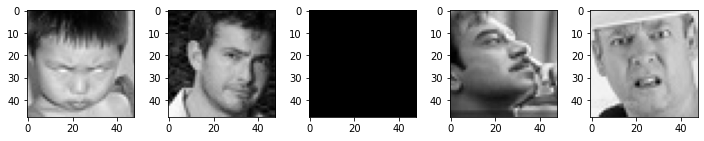

In [11]:
plot_images('/content/drive/MyDrive/train/angry')

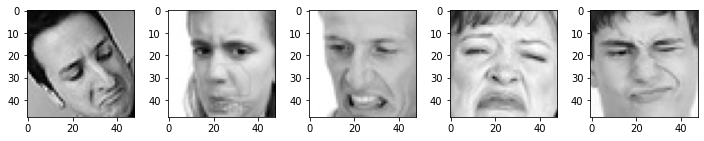

In [ ]:
plot_images('/content/drive/MyDrive/train/disgust')

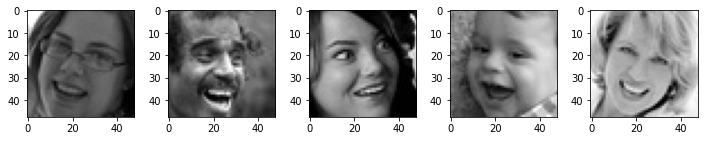

In [ ]:
plot_images('/content/drive/MyDrive/train/happy')

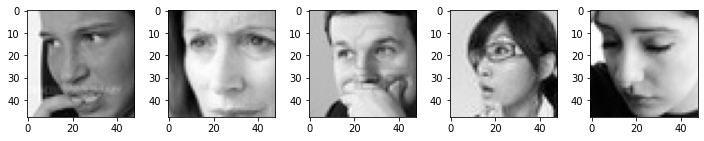

In [12]:
plot_images('/content/drive/MyDrive/train/fear')

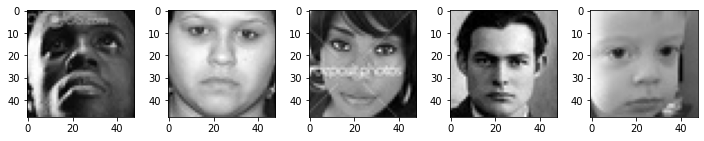

In [ ]:
plot_images('/content/drive/MyDrive/train/neutral')

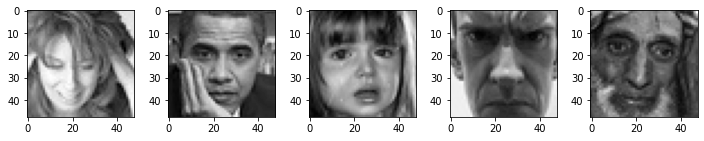

In [ ]:
plot_images('/content/drive/MyDrive/train/sad')

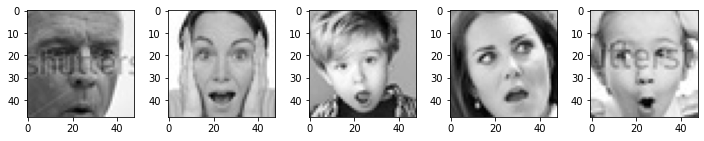

In [13]:
plot_images('/content/drive/MyDrive/train/surprise')

In [ ]:
#plot_images(picure_dir+'/hapy_Riyadh')

In [42]:
## count of each classes in train set
emotion_labels = sorted(os.listdir(train_dir))
print(emotion_labels)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise', 'test.png', 'train.png']


In [43]:
## count of each classes in test set
emotion_labels_test = sorted(os.listdir(test_dir))
print(emotion_labels_test)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [44]:
## count of each classes in testset2
#emotion_labels_picure = sorted(os.listdir(picure_dir))
#print(emotion_labels_picure)

In [45]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)
#riyadh_data_gen = ImageDataGenerator(rescale=1./255)

In [46]:
# Preprocess all train images
train_generator = train_data_gen.flow_from_directory(
        'train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [47]:
# Preprocess all test images
validation_generator = validation_data_gen.flow_from_directory(
        'test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7178 images belonging to 7 classes.


In [48]:
# Preprocess all train images
#riyadh_generator = riyadh_data_gen.flow_from_directory(
#        'picure',
#        target_size=(48, 48),
#        batch_size=64,
#        color_mode="grayscale",
#        class_mode='categorical')

In [ ]:
df1 = {}
for expression in os.listdir("train"):
    directory = "train/" + expression
    df1[expression] = len(os.listdir(directory))
df1 = pd.DataFrame(df1, index=[0])
##
df2 = {}
for expression in os.listdir("test"):
    directory = "test/" + expression
    df2[expression] = len(os.listdir(directory))
df2 = pd.DataFrame(df2, index=[0])

In [34]:
pd.options.plotting.backend = "plotly"
fig = df1.transpose().plot.bar(title="Training Set")
fig.show()
df1


,angry,disgust,fear,happy,neutral,sad,surprise
0,3995,436,4097,7215,4965,4830,3171


In [35]:
##
fig = df2.transpose().plot.bar(title="Testing Set")
fig.show()
df2

,angry,disgust,fear,happy,neutral,sad,surprise
0,958,111,1024,1774,1233,1247,831


## **Model Building**

In [ ]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
import tensorflow as tf
print("Tensorflow version:", tf.__version__)
import pydot
import graphviz
#from keras.utils import plot_model
# 1 from keras.utils.vis_utils import plot_model
# 2 from tensorflow.keras.utils import plot_model
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model
import csv
from PIL import Image
from scipy.ndimage import rotate
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Tensorflow version: 2.7.0


In [ ]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
def get_model():
    model = tf.keras.models.Sequential([
       
        # Block-1
    tf.keras.layers.Conv2D(32, (3, 3), padding='same',
                           input_shape=(48, 48, 1),
                           kernel_initializer='he_normal',
                          kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.MaxPooling2D((2, 2)),
        # (0.1)
        
        # Block-2
    tf.keras.layers.Conv2D(64, (3, 3), padding='same',
                           kernel_initializer='he_normal',
                           input_shape=(48, 48, 1),
                           kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
        # Block-3
    tf.keras.layers.Conv2D(128, (5, 5), padding='same',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
        # Block-4
    tf.keras.layers.Conv2D(512, (3, 3), padding='same',
                           kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.MaxPooling2D((2, 2)),
        
       # Block-5
    tf.keras.layers.Conv2D(512, (3, 3), padding='same', 
                           kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.MaxPooling2D((2, 2)),
       
        # Block-6
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.Dropout(0.2),
        
        
       # Block-7
    tf.keras.layers.Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(7, activation='softmax')
    ])
    # Compile model
    # Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              loss="categorical_crossentropy",
              metrics=['accuracy'])
    return model

### Model Summary & Visualization

In [ ]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 p_re_lu (PReLU)             (None, 48, 48, 32)        73728     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       2

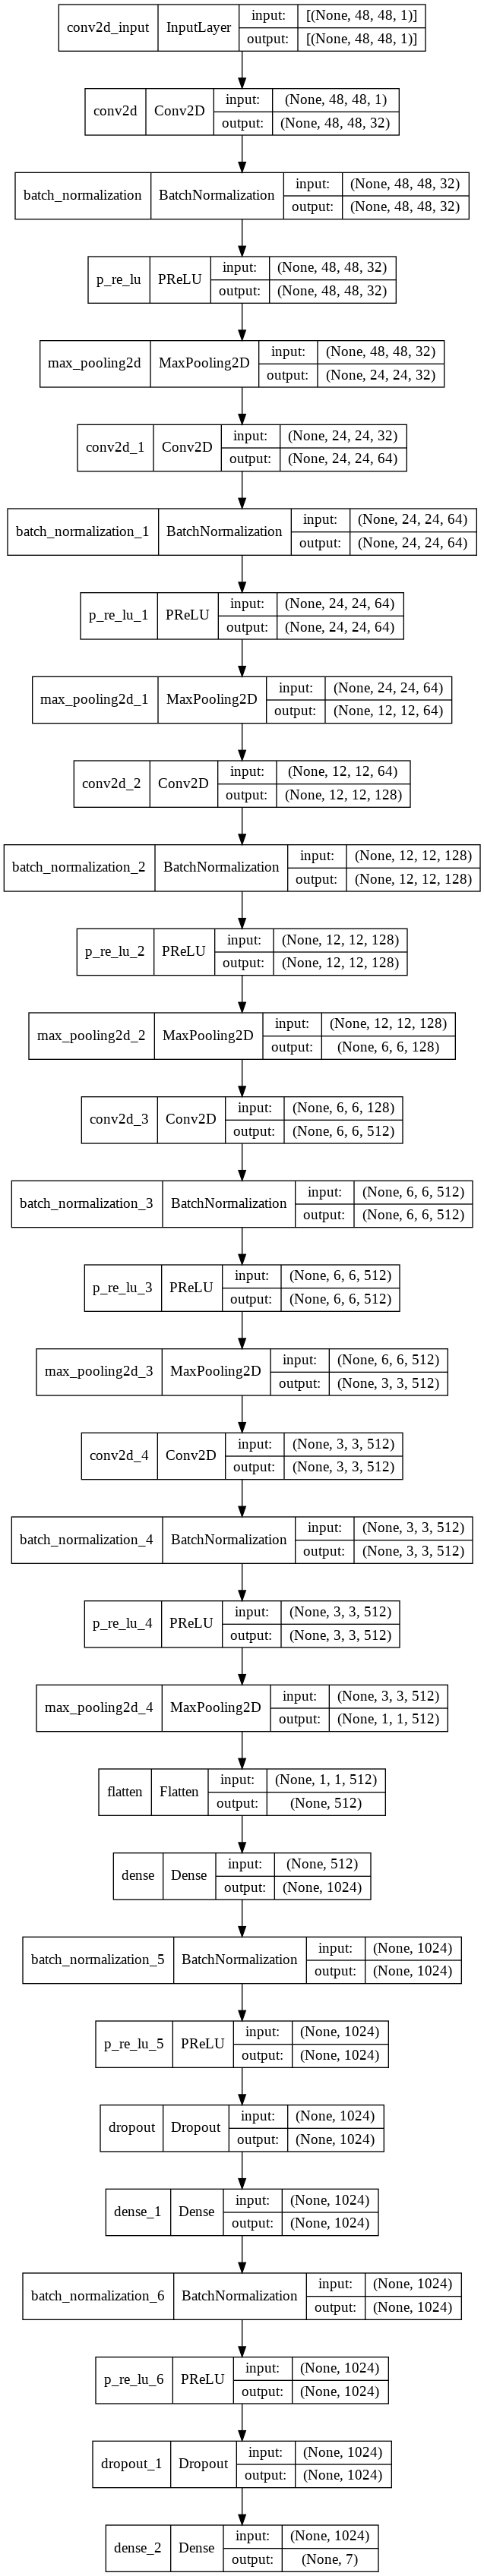

In [ ]:
#import pydot
#import graphviz
#from keras.utils import plot_model

plot_model(model, to_file="model.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('model.png'))

### Callbacks Function 

In [ ]:
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpoint = ModelCheckpoint('Emotion_little_vgg.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]


### Training Model 
####  Fitting the model: train the model using batch_size=64. We will train the model first on 15 epochs to see the accuracy that we will obtain

In [ ]:
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size
epochs=15

history1=model.fit_generator(
                train_generator,
                steps_per_epoch=steps_per_epoch,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=validation_steps)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 2.5148 - accuracy: 0.3927
Epoch 00001: val_loss improved from inf to 2.02621, saving model to Emotion_little_vgg.h5
448/448 [==============================] - 718s 2s/step - loss: 2.5148 - accuracy: 0.3927 - val_loss: 2.0262 - val_accuracy: 0.3590 - lr: 0.0010
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.5390 - accuracy: 0.5119
Epoch 00002: val_loss improved from 2.02621 to 1.45553, saving model to Emotion_little_vgg.h5
448/448 [==============================] - 721s 2s/step - loss: 1.5390 - accuracy: 0.5119 - val_loss: 1.4555 - val_accuracy: 0.4993 - lr: 0.0010
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.2885 - accuracy: 0.5720
Epoch 00003: val_loss improved from 1.45553 to 1.38547, saving model to Emotion_little_vgg.h5
448/448 [==============================] - 721s 2s/step - loss: 1.2885 - accuracy: 0.5720 - val_loss: 1.3855 - val_accuracy: 0.5163 - lr: 0.0010

### Plotting Loss and Accuracy Curves with Epochs 

In [ ]:
epochs = epochs
metric = "loss"
metric2 = "accuracy"
train_m1 = history1.history[metric]
train_m2 = history1.history[metric2]
val_m1 = history1.history[f'val_{metric}']
val_m2 = history1.history[f'val_{metric2}']

fig_model = make_subplots(1,2,
                          subplot_titles=(f"{metric.capitalize()} over Time",
                                          f"{metric2.capitalize()} over Time"))
fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=train_m1,
                               mode="lines+markers",
                               name=f"Training {metric.capitalize()}"),
                    row=1,
                    col=1)
fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=val_m1,
                               mode="lines+markers",
                               name=f"Validation {metric.capitalize()}"),
                    row=1,
                    col=1)

fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=train_m2,
                               mode="lines+markers",
                               name=f"Training {metric2.capitalize()}"),
                    row=1,
                    col=2)
fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=val_m2,
                               mode="lines+markers",
                               name=f"Validation {metric2.capitalize()}"),
                    row=1,
                    col=2)
fig_model.show()

### Save Model

In [ ]:
# Save Model
tf.keras.models.save_model(model, 'Emotion_little_vgg.h5') 

### Discuss the results
By training the CNN model using 15 epochs, the accuracy results are constantly improving from 39 to 87. As the results do not suffer from sudden jumps or fluctuations in accuracy results. Also, the val_acc results have been steadily improving from 35 to 56. However, the model suffers from overfitting. For this we will use one approach to reduce overfitting by changing network complexity by changing the network structure. This method is called Regularization and dropout.

# **Experiment 1**

##  Regularization and dropout.

In [ ]:
def get_model2():
    model2 = tf.keras.models.Sequential([
       
        # Block-1
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=(48, 48, 1), kernel_initializer='he_normal',
                          kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
        
        # Block-2
    tf.keras.layers.Conv2D(64, (3, 3), padding='same',
                           kernel_initializer='he_normal',
                           kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    
        # Block-3
    tf.keras.layers.Conv2D(128, (3,3), padding='same', kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
        
        # Block-4
    tf.keras.layers.Conv2D(256,(3,3), padding = 'same', kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(256,(3,3) ,padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    
        # Block-5
    tf.keras.layers.Conv2D(512, (3, 3), padding='same',
                           kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
        
       # Block-6
    #tf.keras.layers.Conv2D(512, (3, 3), padding='same', kernel_initializer='he_normal'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.PReLU(alpha_initializer='zeros'),
    #tf.keras.layers.MaxPooling2D((2, 2)),
    #tf.keras.layers.Dropout(0.5),
       
        # Block-6
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.Dropout(0.5),
        
        
       # Block-7
    tf.keras.layers.Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(7, activation='softmax')
    ])
    # Compile model
    # Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
    model2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              loss="categorical_crossentropy",
              metrics=['accuracy'])
    return model2

## Model Summary & Visualization

In [ ]:
model2 = get_model2()
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 p_re_lu_7 (PReLU)           (None, 48, 48, 32)        73728     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)       

In [ ]:
#plot_model(model, to_file="model.png", show_shapes=True)
#from IPython.display import Image as IPythonImage
#display(IPythonImage('model.png'))

#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

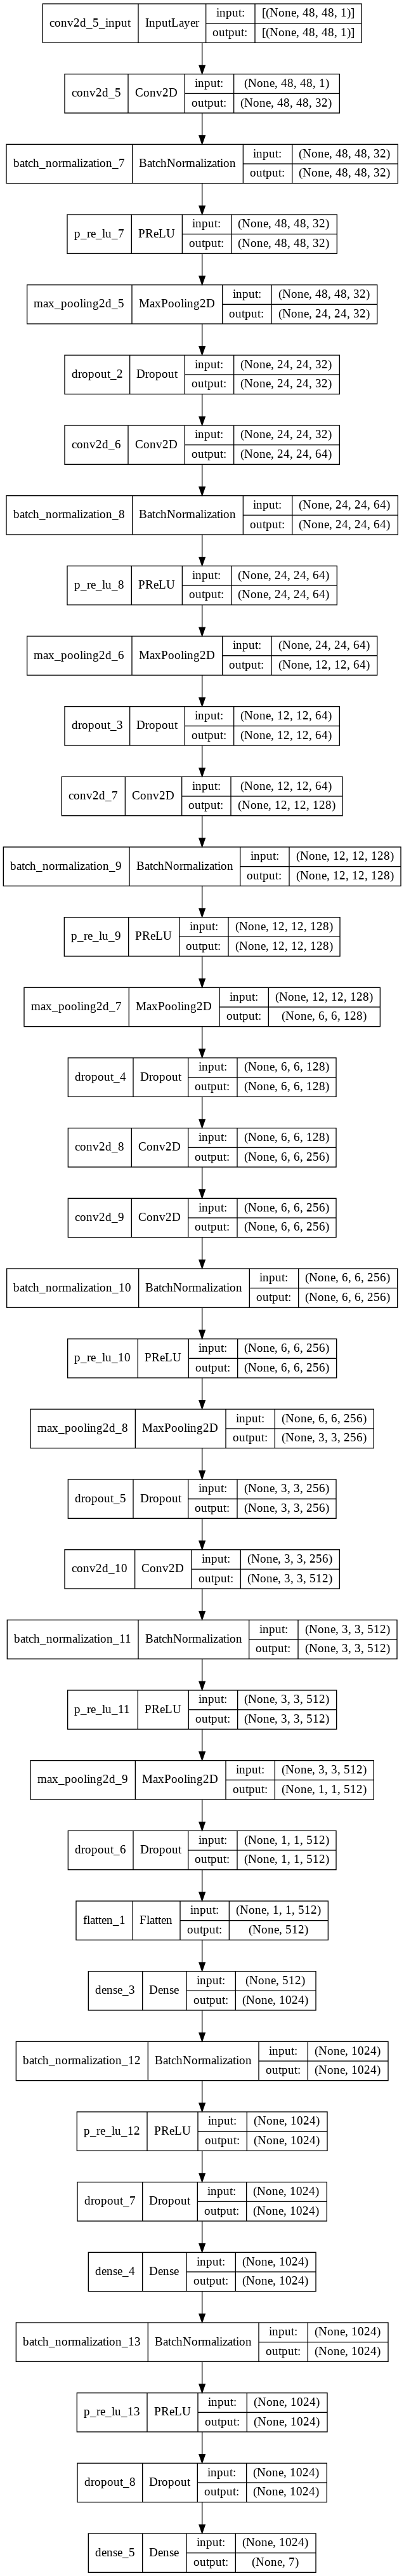

In [ ]:
#import pydot
#import graphviz
#from keras.utils import plot_model

plot_model(model2, to_file="model2.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('model2.png'))


## Callbacks Function 

In [ ]:
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpoint = ModelCheckpoint('model2.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]

## Training Model

In [ ]:
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size
epochs=15

history2=model2.fit_generator(
                train_generator,
                steps_per_epoch=steps_per_epoch,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=validation_steps)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 2.5287 - accuracy: 0.2159
Epoch 00001: val_loss improved from inf to 1.99330, saving model to model2.h5
448/448 [==============================] - 579s 1s/step - loss: 2.5287 - accuracy: 0.2159 - val_loss: 1.9933 - val_accuracy: 0.2471 - lr: 0.0010
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.9349 - accuracy: 0.2481
Epoch 00002: val_loss improved from 1.99330 to 1.96475, saving model to model2.h5
448/448 [==============================] - 515s 1s/step - loss: 1.9349 - accuracy: 0.2481 - val_loss: 1.9648 - val_accuracy: 0.2493 - lr: 0.0010
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.7768 - accuracy: 0.3235
Epoch 00003: val_loss did not improve from 1.96475
448/448 [==============================] - 517s 1s/step - loss: 1.7768 - accuracy: 0.3235 - val_loss: 2.2469 - val_accuracy: 0.2492 - lr: 0.0010
Epoch 4/15
448/448 [==============================] - ETA: 0s - lo

## Plotting Loss and Accuracy Curves with Epochs

In [ ]:
epochs = epochs
metric = "loss"
metric2 = "accuracy"
train_m1 = history2.history[metric]
train_m2 = history2.history[metric2]
val_m1 = history2.history[f'val_{metric}']
val_m2 = history2.history[f'val_{metric2}']

fig_model2 = make_subplots(1,2,
                          subplot_titles=(f"{metric.capitalize()} over Time",
                                          f"{metric2.capitalize()} over Time"))
fig_model2.add_trace(go.Scatter(x=np.arange(epochs),
                               y=train_m1,
                               mode="lines+markers",
                               name=f"Training {metric.capitalize()}"),
                    row=1,
                    col=1)
fig_model2.add_trace(go.Scatter(x=np.arange(epochs),
                               y=val_m1,
                               mode="lines+markers",
                               name=f"Validation {metric.capitalize()}"),
                    row=1,
                    col=1)

fig_model2.add_trace(go.Scatter(x=np.arange(epochs),
                               y=train_m2,
                               mode="lines+markers",
                               name=f"Training {metric2.capitalize()}"),
                    row=1,
                    col=2)
fig_model2.add_trace(go.Scatter(x=np.arange(epochs),
                               y=val_m2,
                               mode="lines+markers",
                               name=f"Validation {metric2.capitalize()}"),
                    row=1,
                    col=2)
fig_model2.show()

## Save Model

In [ ]:
# Save Model
tf.keras.models.save_model(model, 'model2.h5') 

# **Experiment 2**

In [ ]:
def get_model3():
    model3 = tf.keras.models.Sequential([
       
        # Block-1
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=(48, 48, 1),
                           kernel_initializer='he_normal',
                          kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
        # (0.1)
        
        # Block-2
    tf.keras.layers.Conv2D(64, (3, 3), padding='same',
                           kernel_initializer='he_normal',
                           kernel_regularizer = tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    
        # Block-3
    tf.keras.layers.Conv2D(128, (5, 5), padding='same',
                          kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
    
        # Block-4
    tf.keras.layers.Conv2D(256, (3, 3), padding='same',
                           kernel_initializer='he_normal'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),
        
       # Block-5
    #tf.keras.layers.Conv2D(512, (3, 3), padding='same', 
                           #kernel_initializer='he_normal'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.PReLU(alpha_initializer='zeros'),
    #tf.keras.layers.MaxPooling2D((2, 2)),
    #tf.keras.layers.Dropout(0.1),
       
        # Block-6
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.Dropout(0.2),
        
        
       # Block-7
    tf.keras.layers.Dense(1024),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(7, activation='softmax')
    ])
    # Compile model
    # Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
    model3.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              loss="categorical_crossentropy",
              metrics=['accuracy'])
    return model3

## Model Summary & Visualization

In [ ]:
model3 = get_model3()
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 batch_normalization_14 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 p_re_lu_14 (PReLU)          (None, 48, 48, 32)        73728     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 24, 24, 64)       

## Callbacks Function 

In [ ]:
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpoint = ModelCheckpoint('model3.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]


## Training Model 


In [ ]:
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size
epochs=15

history3=model3.fit_generator(
                train_generator,
                steps_per_epoch=steps_per_epoch,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=validation_steps)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 2.7451 - accuracy: 0.3274
Epoch 00001: val_loss improved from inf to 2.11382, saving model to model3.h5
448/448 [==============================] - 409s 909ms/step - loss: 2.7451 - accuracy: 0.3274 - val_loss: 2.1138 - val_accuracy: 0.2793 - lr: 0.0010
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.6962 - accuracy: 0.4328
Epoch 00002: val_loss improved from 2.11382 to 1.58341, saving model to model3.h5
448/448 [==============================] - 405s 904ms/step - loss: 1.6962 - accuracy: 0.4328 - val_loss: 1.5834 - val_accuracy: 0.4572 - lr: 0.0010
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.4540 - accuracy: 0.4944
Epoch 00003: val_loss improved from 1.58341 to 1.39201, saving model to model3.h5
448/448 [==============================] - 404s 903ms/step - loss: 1.4540 - accuracy: 0.4944 - val_loss: 1.3920 - val_accuracy: 0.5073 - lr: 0.0010
Epoch 4/15
448/448 [======

## Plotting Loss and Accuracy Curves with Epochs 

In [ ]:
epochs = epochs
metric = "loss"
metric2 = "accuracy"
train_m1 = history3.history[metric]
train_m2 = history3.history[metric2]
val_m1 = history3.history[f'val_{metric}']
val_m2 = history3.history[f'val_{metric2}']

fig_model3 = make_subplots(1,2,
                          subplot_titles=(f"{metric.capitalize()} over Time",
                                          f"{metric2.capitalize()} over Time"))
fig_model3.add_trace(go.Scatter(x=np.arange(epochs),
                               y=train_m1,
                               mode="lines+markers",
                               name=f"Training {metric.capitalize()}"),
                    row=1,
                    col=1)
fig_model3.add_trace(go.Scatter(x=np.arange(epochs),
                               y=val_m1,
                               mode="lines+markers",
                               name=f"Validation {metric.capitalize()}"),
                    row=1,
                    col=1)

fig_model3.add_trace(go.Scatter(x=np.arange(epochs),
                               y=train_m2,
                               mode="lines+markers",
                               name=f"Training {metric2.capitalize()}"),
                    row=1,
                    col=2)
fig_model3.add_trace(go.Scatter(x=np.arange(epochs),
                               y=val_m2,
                               mode="lines+markers",
                               name=f"Validation {metric2.capitalize()}"),
                    row=1,
                    col=2)
fig_model3.show()

### Testing the Model again

In [25]:
# Final evaluation of the model

#metrics = model3.evaluate(validation_generator, verbose=1)
#print("Test Accuracy: {}".format(metrics[1]))
#print("Test Loss: {}".format(metrics[0]))

# **Experiment 3**

In [ ]:
# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])


### Model Summary & Visualization

In [ ]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

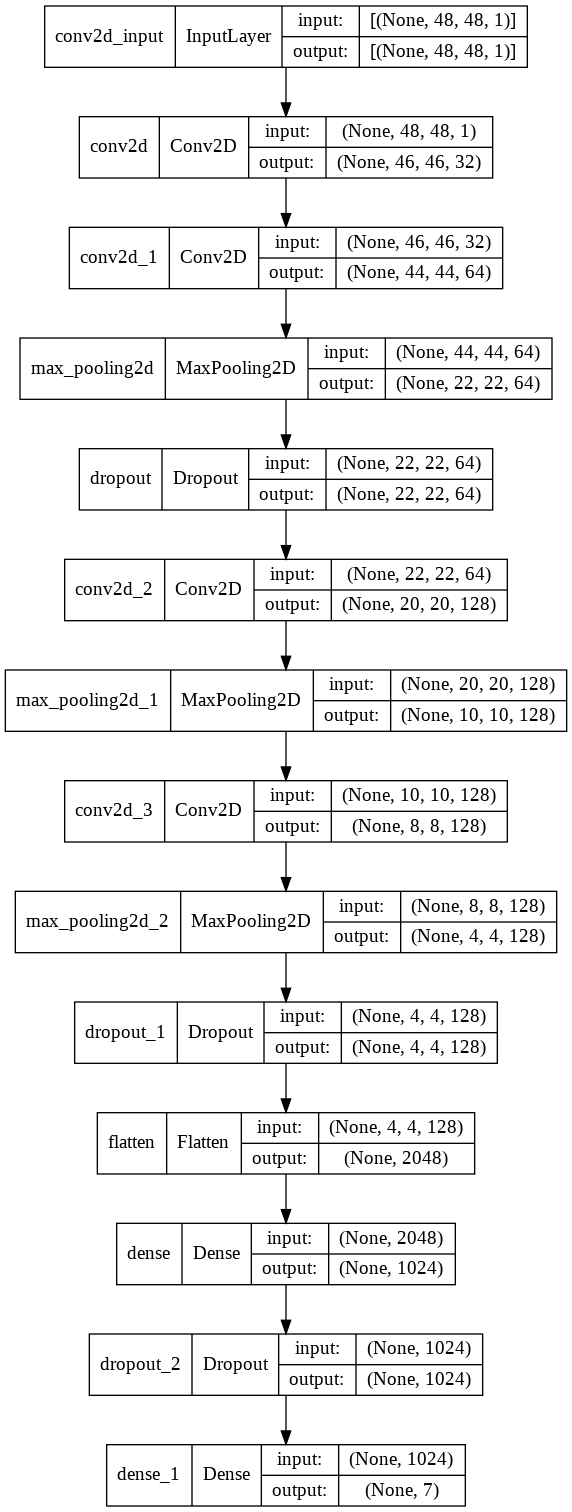

In [ ]:
#import pydot
#import graphviz
#from keras.utils import plot_model

plot_model(emotion_model, to_file="model.png", show_shapes=True)
from IPython.display import Image as IPythonImage
display(IPythonImage('model.png'))

#plot_model(fernet, to_file='fernet.png', show_shapes=True, show_layer_names=True)

### Callbacks Function 

In [ ]:
# using checkpoints to save model weights to be used later instead of training again on the same epochs.
checkpoint = ModelCheckpoint('final_model.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]


### Training Model 
####  Fitting the model: train the model using batch_size=64. We will train the model first on 15 epochs to see the accuracy that we will obtain

In [ ]:
# Train the neural network/model
epochs=15
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=epochs,
        callbacks=callbacks,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 1.7995 - accuracy: 0.2613
Epoch 00001: val_loss improved from inf to 1.70304, saving model to final_model.h5
448/448 [==============================] - 432s 961ms/step - loss: 1.7995 - accuracy: 0.2613 - val_loss: 1.7030 - val_accuracy: 0.3418 - lr: 1.0000e-04
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.6327 - accuracy: 0.3600
Epoch 00002: val_loss improved from 1.70304 to 1.54787, saving model to final_model.h5
448/448 [==============================] - 428s 955ms/step - loss: 1.6327 - accuracy: 0.3600 - val_loss: 1.5479 - val_accuracy: 0.4103 - lr: 1.0000e-04
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.5213 - accuracy: 0.4143
Epoch 00003: val_loss improved from 1.54787 to 1.45142, saving model to final_model.h5
448/448 [==============================] - 427s 954ms/step - loss: 1.5213 - accuracy: 0.4143 - val_loss: 1.4514 - val_accuracy: 0.4475 - lr: 1.0000e-04

### Save Model

In [ ]:
# Save Model
tf.keras.models.save_model(emotion_model, 'final_model.h5') 

In [ ]:
epochs = 30
checkpoint = ModelCheckpoint(filepath='/content/final_model.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]

In [ ]:
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=epochs,
        callbacks=callbacks,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

Epoch 1/30
448/448 [==============================] - ETA: 0s - loss: 1.0278 - accuracy: 0.6176
Epoch 00001: val_loss improved from inf to 1.11898, saving model to /content/final_model.h5
448/448 [==============================] - 418s 933ms/step - loss: 1.0278 - accuracy: 0.6176 - val_loss: 1.1190 - val_accuracy: 0.5806 - lr: 1.0000e-04
Epoch 2/30
448/448 [==============================] - ETA: 0s - loss: 1.0011 - accuracy: 0.6301
Epoch 00002: val_loss improved from 1.11898 to 1.10767, saving model to /content/final_model.h5
448/448 [==============================] - 423s 944ms/step - loss: 1.0011 - accuracy: 0.6301 - val_loss: 1.1077 - val_accuracy: 0.5845 - lr: 1.0000e-04
Epoch 3/30
448/448 [==============================] - ETA: 0s - loss: 0.9858 - accuracy: 0.6361
Epoch 00003: val_loss improved from 1.10767 to 1.09572, saving model to /content/final_model.h5
448/448 [==============================] - 420s 937ms/step - loss: 0.9858 - accuracy: 0.6361 - val_loss: 1.0957 - val_accura

### Plotting Loss and Accuracy Curves with Epochs 

In [ ]:
epochs = epochs
metric = "loss"
metric2 = "accuracy"
train_m1 = emotion_model_info.history[metric]
train_m2 = emotion_model_info.history[metric2]
val_m1 = emotion_model_info.history[f'val_{metric}']
val_m2 = emotion_model_info.history[f'val_{metric2}']

fig_model = make_subplots(1,2,
                          subplot_titles=(f"{metric.capitalize()} over Time",
                                          f"{metric2.capitalize()} over Time"))
fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=train_m1,
                               mode="lines+markers",
                               name=f"Training {metric.capitalize()}"),
                    row=1,
                    col=1)
fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=val_m1,
                               mode="lines+markers",
                               name=f"Validation {metric.capitalize()}"),
                    row=1,
                    col=1)

fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=train_m2,
                               mode="lines+markers",
                               name=f"Training {metric2.capitalize()}"),
                    row=1,
                    col=2)
fig_model.add_trace(go.Scatter(x=np.arange(epochs),
                               y=val_m2,
                               mode="lines+markers",
                               name=f"Validation {metric2.capitalize()}"),
                    row=1,
                    col=2)
fig_model.show()

In [ ]:
# Save Model
tf.keras.models.save_model(emotion_model, 'final_model.h5') 